In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from datetime import datetime, timedelta

df = pd.read_csv(r"../Datasets/jobs_with_topics.csv")

print(df['Chuyên môn'].value_counts())
df[['Chuyên môn','Topic_ID','Topic_Keywords','Thời gian đăng']].head(5)

Chuyên môn
Other             2710
Data Analyst       432
ML Engineer        123
Data Scientist      93
Name: count, dtype: int64


,Chuyên môn,Topic_ID,Topic_Keywords,Thời gian đăng
0,Data Analyst,0,"data, công, việc, experience, liệu",2025-11-20
1,Data Analyst,-1,Nhiễu/Không xác định,2025-12-18
2,Data Analyst,0,"data, công, việc, experience, liệu",2025-11-20
3,Data Analyst,0,"data, công, việc, experience, liệu",2025-12-18
4,Data Analyst,0,"data, công, việc, experience, liệu",2025-12-17


In [ ]:
# Lấy danh sách các cặp Topic ID và Từ khóa duy nhất
topic_list = df[['Topic_ID', 'Topic_Keywords']].drop_duplicates().sort_values('Topic_ID')

# 2. Hiển thị danh sách
print(f"{'ID':<10} | {'Từ khóa đi kèm'}")
print("-" * 60)

for _, row in topic_list.iterrows():
    t_id = row['Topic_ID']
    keywords = row['Topic_Keywords']
    
    # Định dạng hiển thị: Nếu là Topic -1 thì ghi rõ là Nhiễu
    label = "Outlier" if t_id == -1 else f"Topic {t_id}"
    print(f"{label:<10} | {keywords}")

C:\Users\thean\AppData\Local\Temp\ipykernel_7264\170364916.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatmap['Topic_Label'] = df_heatmap.apply(


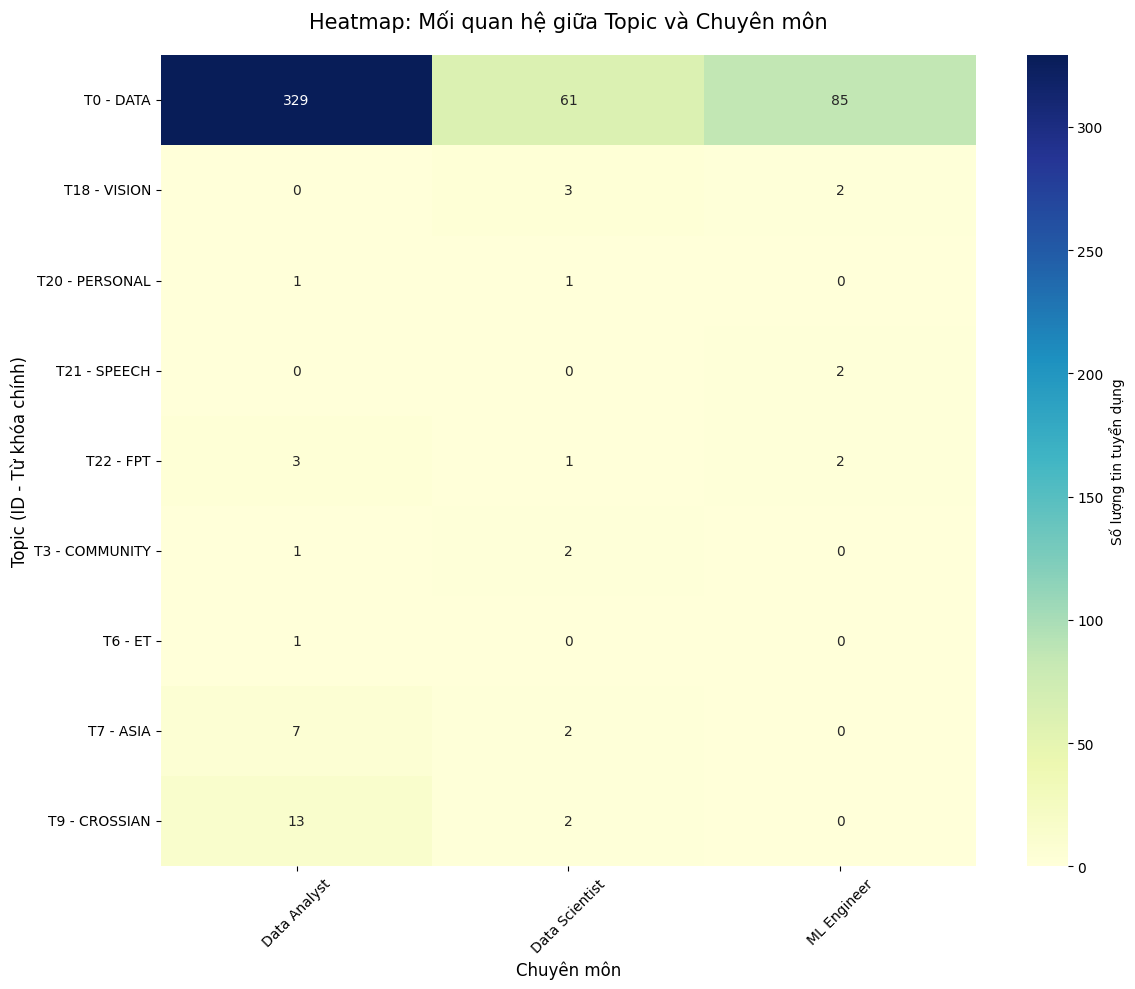

In [11]:
# heatmap topic vs chuyên môn
df_heatmap = df[df['Chuyên môn'].isin(['Data Analyst', 'Data Scientist', 'ML Engineer'])]
def get_first_word(keywords):
    if pd.isna(keywords) or keywords == "Nhiễu/Không xác định":
        return "Nhiễu"
    return keywords.split(',')[0].strip().upper()

# Tạo cột nhãn hiển thị: "ID - Từ khóa" (Ví dụ: "Topic 0 - DATA")
df_heatmap['Topic_Label'] = df_heatmap.apply(
    lambda row: f"T{row['Topic_ID']} - {get_first_word(row['Topic_Keywords'])}", axis=1
)

# Tạo bảng tần suất (Pivot table)
pivot_table = pd.crosstab(df_heatmap['Topic_Label'], df_heatmap['Chuyên môn'])

# Loại bỏ hàng "Nhiễu" 
if "T-1 - Nhiễu" in pivot_table.index:
    pivot_table = pivot_table.drop("T-1 - Nhiễu")

# Vẽ biểu đồ
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Số lượng tin tuyển dụng'})

plt.title('Heatmap: Mối quan hệ giữa Topic và Chuyên môn', fontsize=15, pad=20)
plt.xlabel('Chuyên môn', fontsize=12)
plt.ylabel('Topic (ID - Từ khóa chính)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Lưu biểu đồ
plt.savefig(r'../Figures/topic_specialization_heatmap.png')
plt.show()

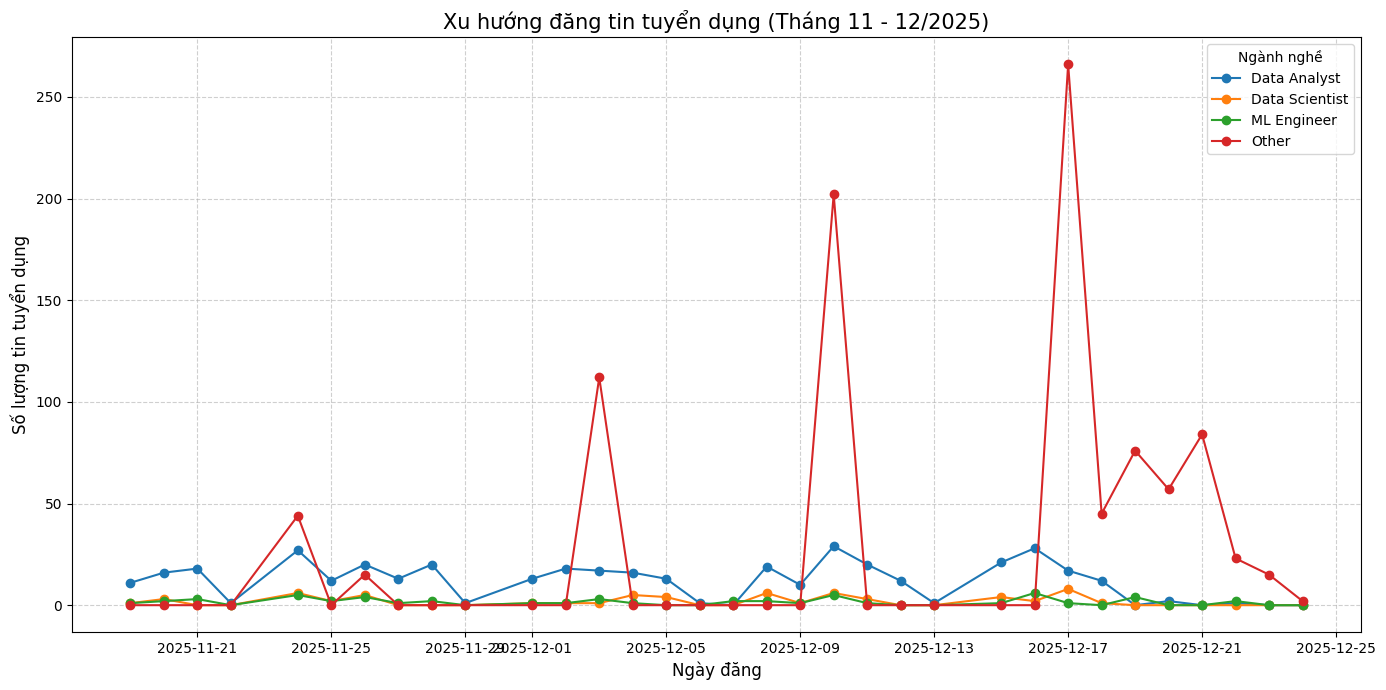

In [ ]:
# Chỉ lấy dữ liệu trong khoảng 2 tháng gần nhất để biểu đồ rõ ràng
df['Thời gian đăng'] = pd.to_datetime(df['Thời gian đăng'])
df_trend = df[df['Thời gian đăng'] >= datetime(2025, 11, 1)].copy()

# Group theo ngày và Chuyên môn 
trend_data = df_trend.groupby([df_trend['Thời gian đăng'].dt.date, 'Chuyên môn']).size().unstack().fillna(0)

# Vẽ biểu đồ đường
plt.figure(figsize=(14, 7))
trend_data.plot(kind='line', marker='o', ax=plt.gca())

plt.title('Xu hướng đăng tin tuyển dụng (Tháng 11 - 12/2025)', fontsize=15)
plt.xlabel('Ngày đăng', fontsize=12)
plt.ylabel('Số lượng tin tuyển dụng', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Ngành nghề')
plt.tight_layout()
plt.show()